## IPL DATA ANALYSIS

In [1]:
#importing necessary libraries
import pandas as pd
import glob
import csv
from itertools import chain
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objs as go
import plotly.tools as tls
import plotly.offline as py
import plotly.offline as py
%matplotlib inline
plt.style.use('fivethirtyeight')
import plotly.offline as py
import plotly.graph_objs as go
import plotly.tools as tls

data = []
for f in glob.glob("ipl_csv/*.csv"):
    file = open(f)
    reader = csv.reader(file)
    for row in reader:
        data.append(row)

    file.close()
df = pd.DataFrame(data)

/home/nyalazone-13/environments/venv/lib/python3.6/site-packages/requests/__init__.py:91: RequestsDependencyWarning: urllib3 (1.24.1) or chardet (2.3.0) doesn't match a supported version!
  RequestsDependencyWarning)


In [2]:
df.head()

,0,1,2,3,4,5,6,7,8,9,10
0,version,1.3.0,None,None,None,None,None,None,None,None,None
1,info,team,Rajasthan Royals,None,None,None,None,None,None,None,None
2,info,team,Delhi Daredevils,None,None,None,None,None,None,None,None
3,info,gender,male,None,None,None,None,None,None,None,None
4,info,season,2012,None,None,None,None,None,None,None,None


In [3]:
#parsing data
version = df.loc[df[0] == 'version']
version = version[[1]].drop_duplicates().T
version.columns = ['version']
version = version.reset_index(drop=True)

In [4]:
version

,version
0,1.3.0


In [5]:
ball = df.loc[df[0] == 'ball']
ball = ball.drop(columns=[0])
ball.columns = ['innings', 'ball_in_over', 'batting_team', 'striker_batsman', 'other_batsman', 'runs', 'bowler', 'extras', 'dismissal_type', 'dismissed_batsman']
in_game_info = ball.reset_index(drop=True)

In [6]:
in_game_info.head()

,innings,ball_in_over,batting_team,striker_batsman,other_batsman,runs,bowler,extras,dismissal_type,dismissed_batsman
0,1,0.1,Rajasthan Royals,R Dravid,AM Rahane,IK Pathan,0,0,,
1,1,0.2,Rajasthan Royals,R Dravid,AM Rahane,IK Pathan,1,0,,
2,1,0.3,Rajasthan Royals,AM Rahane,R Dravid,IK Pathan,0,0,,
3,1,0.4,Rajasthan Royals,AM Rahane,R Dravid,IK Pathan,4,0,,
4,1,0.5,Rajasthan Royals,AM Rahane,R Dravid,IK Pathan,0,0,,


In [7]:
info = df.loc[df[0] == 'info']
index = 0
list_of_dfs = []
while index < info.shape[0]:
    temp = info[index:index+19][0:19].T.dropna(how='all')
    temp.columns = temp.iloc[1]
    temp = temp[2:]
    list_of_dfs.append(temp)
    index += 19

list_of_dicts = [cur_df.T.to_dict().values() for cur_df in list_of_dfs]    
concat_df = pd.DataFrame(list(chain(*list_of_dicts)))
matches_info = concat_df.reset_index(drop=True)

In [8]:
#final dataframe
matches_info

,city,competition,date,eliminator,gender,match_number,match_referee,method,neutralvenue,outcome,...,season,team,toss_decision,toss_winner,tv_umpire,umpire,venue,winner,winner_runs,winner_wickets
0,Jaipur,Indian Premier League,2012/05/01,NaN,male,43,Raju Mukherjee,NaN,NaN,NaN,...,2012,Delhi Daredevils,bat,Rajasthan Royals,S Ravi,SJA Taufel,Sawai Mansingh Stadium,Delhi Daredevils,NaN,6
1,Kolkata,Indian Premier League,2012/05/14,NaN,male,63,Raju Mukherjee,NaN,NaN,NaN,...,2012,Chennai Super Kings,field,Chennai Super Kings,S Ravi,SJA Taufel,Eden Gardens,Chennai Super Kings,NaN,5
2,Ahmedabad,Indian Premier League,2015/04/21,Kings XI Punjab,male,18,Chinmay Sharma,NaN,NaN,tie,...,2015,Kings XI Punjab,field,Kings XI Punjab,AK Chaudhary,S Ravi,"Sardar Patel Stadium, Motera",NaN,NaN,NaN
3,Hyderabad,Indian Premier League,2013/05/04,NaN,male,48,J Srinath,NaN,NaN,NaN,...,2013,Delhi Daredevils,bat,Delhi Daredevils,AK Chaudhary,S Asnani,"Rajiv Gandhi International Stadium, Uppal",Sunrisers Hyderabad,NaN,6
4,Bangalore,Indian Premier League,2011/05/06,NaN,male,47,AJ Pycroft,NaN,NaN,NaN,...,2011,Kings XI Punjab,field,Kings XI Punjab,SS Hazare,RB Tiffin,M Chinnaswamy Stadium,Royal Challengers Bangalore,85,NaN
5,Kolkata,Indian Premier League,2017/04/13,NaN,male,11,AJ Pycroft,NaN,NaN,NaN,...,2017,Kings XI Punjab,field,Kolkata Knight Riders,AY Dandekar,NJ Llong,Eden Gardens,Kolkata Knight Riders,NaN,8
6,Ranchi,Indian Premier League,2013/05/15,NaN,male,65,RS Madugalle,NaN,NaN,NaN,...,2013,Pune Warriors,field,Kolkata Knight Riders,VA Kulkarni,K Srinath,JSCA International Stadium Complex,Pune Warriors,7,NaN
7,Kanpur,Indian Premier League,2016/05/21,NaN,male,54,RS Mahanama,NaN,NaN,NaN,...,2016,Mumbai Indians,field,Gujarat Lions,AY Dandekar,CK Nandan,Green Park,Gujarat Lions,NaN,6
8,Chandigarh,Indian Premier League,2008/05/23,NaN,male,48,Talat Ali,NaN,NaN,NaN,...,2007/08,Deccan Chargers,field,Kings XI Punjab,AM Saheba,SJ Davis,"Punjab Cricket Association Stadium, Mohali",Kings XI Punjab,NaN,6
9,Chandigarh,Indian Premier League,2008/04/19,NaN,male,2,S Venkataraghavan,NaN,NaN,NaN,...,2007/08,Chennai Super Kings,bat,Chennai Super Kings,RB Tiffin,SL Shastri,"Punjab Cricket Association Stadium, Mohali",Chennai Super Kings,33,NaN


In [9]:
matches_info_analysis = matches_info.copy()

In [10]:
matches_info_analysis.columns #column names

Index(['city', 'competition', 'date', 'eliminator', 'gender', 'match_number',
       'match_referee', 'method', 'neutralvenue', 'outcome', 'player_of_match',
       'reserve_umpire', 'season', 'team', 'toss_decision', 'toss_winner',
       'tv_umpire', 'umpire', 'venue', 'winner', 'winner_runs',
       'winner_wickets'],
      dtype='object')

In [11]:
matches_info_analysis.shape

(638, 22)

In [12]:
matches_info_analysis.describe() #stats

,city,competition,date,eliminator,gender,match_number,match_referee,method,neutralvenue,outcome,...,season,team,toss_decision,toss_winner,tv_umpire,umpire,venue,winner,winner_runs,winner_wickets
count,635,633,633,7,631,598,633,16,77,10,...,631,637,632,633,630,637,634,622,286,338
unique,30,1,447,5,1,72,20,1,1,2,...,10,14,2,14,56,48,35,14,85,10
top,Mumbai,Indian Premier League,2009/05/09,Kings XI Punjab,male,53,J Srinath,D/L,true,tie,...,2013,Mumbai Indians,field,Mumbai Indians,S Ravi,SJA Taufel,M Chinnaswamy Stadium,Mumbai Indians,10,7
freq,85,633,2,2,631,10,107,16,77,7,...,76,83,361,85,43,53,66,90,9,70


In [13]:
missing_data = matches_info_analysis.isna()
# missing_data

In [14]:
missing_data.dtypes

city               bool
competition        bool
date               bool
eliminator         bool
gender             bool
match_number       bool
match_referee      bool
method             bool
neutralvenue       bool
outcome            bool
player_of_match    bool
reserve_umpire     bool
season             bool
team               bool
toss_decision      bool
toss_winner        bool
tv_umpire          bool
umpire             bool
venue              bool
winner             bool
winner_runs        bool
winner_wickets     bool
dtype: object

In [15]:
missing_data.sum() #number of missing data (nan) in each column

city                 3
competition          5
date                 5
eliminator         631
gender               7
match_number        40
match_referee        5
method             622
neutralvenue       561
outcome            628
player_of_match      8
reserve_umpire      26
season               7
team                 1
toss_decision        6
toss_winner          5
tv_umpire            8
umpire               1
venue                4
winner              16
winner_runs        352
winner_wickets     300
dtype: int64

# Filling missing data and dropping columns

In [16]:
matches_info['gender'].fillna('male') #filling missing gender values as MALE 

0      male
1      male
2      male
3      male
4      male
5      male
6      male
7      male
8      male
9      male
10     male
11     male
12     male
13     male
14     male
15     male
16     male
17     male
18     male
19     male
20     male
21     male
22     male
23     male
24     male
25     male
26     male
27     male
28     male
29     male
       ... 
608    male
609    male
610    male
611    male
612    male
613    male
614    male
615    male
616    male
617    male
618    male
619    male
620    male
621    male
622    male
623    male
624    male
625    male
626    male
627    male
628    male
629    male
630    male
631    male
632    male
633    male
634    male
635    male
636    male
637    male
Name: gender, Length: 638, dtype: object

In [17]:
outcome = matches_info['outcome'].unique()
outcome

array([nan, 'tie', 'no result'], dtype=object)

In [18]:
def map_outcome(outcome):
    if outcome == 'tie':
        return 'tie'
    elif outcome == 'no result':
        return 'no result'
    else:
        return 'not known'
matches_info['outcome'] = matches_info['outcome'].apply(map_outcome)

In [19]:
matches_info['outcome'].unique()

array(['not known', 'tie', 'no result'], dtype=object)

In [20]:
matches_info.drop(['neutralvenue'], axis=1, inplace=True)

In [21]:
matches_info.drop(['method'], axis=1, inplace=True)

In [22]:
matches_info['eliminator'].unique()

array([nan, 'Kings XI Punjab', 'Rajasthan Royals', 'Mumbai Indians',
       'Royal Challengers Bangalore', 'Sunrisers Hyderabad'], dtype=object)

In [23]:
matches_info['winner'].unique()

array(['Delhi Daredevils', 'Chennai Super Kings', nan,
       'Sunrisers Hyderabad', 'Royal Challengers Bangalore',
       'Kolkata Knight Riders', 'Pune Warriors', 'Gujarat Lions',
       'Kings XI Punjab', 'Mumbai Indians', 'Rajasthan Royals',
       'Rising Pune Supergiants', 'Deccan Chargers',
       'Kochi Tuskers Kerala', 'Rising Pune Supergiant'], dtype=object)

In [24]:
matches_info['team'].unique()

array(['Delhi Daredevils', 'Chennai Super Kings', 'Kings XI Punjab',
       'Pune Warriors', 'Mumbai Indians', 'Deccan Chargers',
       'Sunrisers Hyderabad', 'Kolkata Knight Riders',
       'Royal Challengers Bangalore', 'Kochi Tuskers Kerala',
       'Rajasthan Royals', 'Rising Pune Supergiants', 'Gujarat Lions',
       'Rising Pune Supergiant', nan], dtype=object)

In [25]:
#replacing team with their abberavtions 
matches_info.replace(['Delhi Daredevils', 'Chennai Super Kings', 'Kings XI Punjab',
       'Pune Warriors', 'Mumbai Indians', 'Deccan Chargers',
       'Sunrisers Hyderabad', 'Kolkata Knight Riders',
       'Royal Challengers Bangalore', 'Kochi Tuskers Kerala',
       'Rajasthan Royals', 'Rising Pune Supergiants', 'Gujarat Lions',
       'Rising Pune Supergiant'],['DD','CSK','KXIP','PW','MI','DC','SRH','KKR','RCB','KTK','RR','RPS','GL','RPS'],inplace=True)

In [26]:
matches_info

,city,competition,date,eliminator,gender,match_number,match_referee,outcome,player_of_match,reserve_umpire,season,team,toss_decision,toss_winner,tv_umpire,umpire,venue,winner,winner_runs,winner_wickets
0,Jaipur,Indian Premier League,2012/05/01,NaN,male,43,Raju Mukherjee,not known,P Negi,K Bharatan,2012,DD,bat,RR,S Ravi,SJA Taufel,Sawai Mansingh Stadium,DD,NaN,6
1,Kolkata,Indian Premier League,2012/05/14,NaN,male,63,Raju Mukherjee,not known,MEK Hussey,AS Pathania,2012,CSK,field,CSK,S Ravi,SJA Taufel,Eden Gardens,CSK,NaN,5
2,Ahmedabad,Indian Premier League,2015/04/21,KXIP,male,18,Chinmay Sharma,tie,SE Marsh,K Srinath,2015,KXIP,field,KXIP,AK Chaudhary,S Ravi,"Sardar Patel Stadium, Motera",NaN,NaN,NaN
3,Hyderabad,Indian Premier League,2013/05/04,NaN,male,48,J Srinath,not known,DJG Sammy,A Nand Kishore,2013,DD,bat,DD,AK Chaudhary,S Asnani,"Rajiv Gandhi International Stadium, Uppal",SRH,NaN,6
4,Bangalore,Indian Premier League,2011/05/06,NaN,male,47,AJ Pycroft,not known,CH Gayle,CK Nandan,2011,KXIP,field,KXIP,SS Hazare,RB Tiffin,M Chinnaswamy Stadium,RCB,85,NaN
5,Kolkata,Indian Premier League,2017/04/13,NaN,male,11,AJ Pycroft,not known,SP Narine,N Pandit,2017,KXIP,field,KKR,AY Dandekar,NJ Llong,Eden Gardens,KKR,NaN,8
6,Ranchi,Indian Premier League,2013/05/15,NaN,male,65,RS Madugalle,not known,MK Pandey,PK Khakhar,2013,PW,field,KKR,VA Kulkarni,K Srinath,JSCA International Stadium Complex,PW,7,NaN
7,Kanpur,Indian Premier League,2016/05/21,NaN,male,54,RS Mahanama,not known,SK Raina,R Pandit,2016,MI,field,GL,AY Dandekar,CK Nandan,Green Park,GL,NaN,6
8,Chandigarh,Indian Premier League,2008/05/23,NaN,male,48,Talat Ali,not known,SE Marsh,HS Sekhon,2007/08,DC,field,KXIP,AM Saheba,SJ Davis,"Punjab Cricket Association Stadium, Mohali",KXIP,NaN,6
9,Chandigarh,Indian Premier League,2008/04/19,NaN,male,2,S Venkataraghavan,not known,MEK Hussey,MSS Ranawat,2007/08,CSK,bat,CSK,RB Tiffin,SL Shastri,"Punjab Cricket Association Stadium, Mohali",CSK,33,NaN


In [27]:
matches_info.update(matches_info[['eliminator','team','toss_winner','winner']].fillna(0))

In [28]:
matches_info['city'].fillna('missing city', inplace=True)

In [29]:
matches_info['competition'].fillna('Indian Premier League') 

0      Indian Premier League
1      Indian Premier League
2      Indian Premier League
3      Indian Premier League
4      Indian Premier League
5      Indian Premier League
6      Indian Premier League
7      Indian Premier League
8      Indian Premier League
9      Indian Premier League
10     Indian Premier League
11     Indian Premier League
12     Indian Premier League
13     Indian Premier League
14     Indian Premier League
15     Indian Premier League
16     Indian Premier League
17     Indian Premier League
18     Indian Premier League
19     Indian Premier League
20     Indian Premier League
21     Indian Premier League
22     Indian Premier League
23     Indian Premier League
24     Indian Premier League
25     Indian Premier League
26     Indian Premier League
27     Indian Premier League
28     Indian Premier League
29     Indian Premier League
               ...          
608    Indian Premier League
609    Indian Premier League
610    Indian Premier League
611    Indian 

In [30]:
matches_info.drop(['match_number'], axis=1)

,city,competition,date,eliminator,gender,match_referee,outcome,player_of_match,reserve_umpire,season,team,toss_decision,toss_winner,tv_umpire,umpire,venue,winner,winner_runs,winner_wickets
0,Jaipur,Indian Premier League,2012/05/01,0,male,Raju Mukherjee,not known,P Negi,K Bharatan,2012,DD,bat,RR,S Ravi,SJA Taufel,Sawai Mansingh Stadium,DD,NaN,6
1,Kolkata,Indian Premier League,2012/05/14,0,male,Raju Mukherjee,not known,MEK Hussey,AS Pathania,2012,CSK,field,CSK,S Ravi,SJA Taufel,Eden Gardens,CSK,NaN,5
2,Ahmedabad,Indian Premier League,2015/04/21,KXIP,male,Chinmay Sharma,tie,SE Marsh,K Srinath,2015,KXIP,field,KXIP,AK Chaudhary,S Ravi,"Sardar Patel Stadium, Motera",0,NaN,NaN
3,Hyderabad,Indian Premier League,2013/05/04,0,male,J Srinath,not known,DJG Sammy,A Nand Kishore,2013,DD,bat,DD,AK Chaudhary,S Asnani,"Rajiv Gandhi International Stadium, Uppal",SRH,NaN,6
4,Bangalore,Indian Premier League,2011/05/06,0,male,AJ Pycroft,not known,CH Gayle,CK Nandan,2011,KXIP,field,KXIP,SS Hazare,RB Tiffin,M Chinnaswamy Stadium,RCB,85,NaN
5,Kolkata,Indian Premier League,2017/04/13,0,male,AJ Pycroft,not known,SP Narine,N Pandit,2017,KXIP,field,KKR,AY Dandekar,NJ Llong,Eden Gardens,KKR,NaN,8
6,Ranchi,Indian Premier League,2013/05/15,0,male,RS Madugalle,not known,MK Pandey,PK Khakhar,2013,PW,field,KKR,VA Kulkarni,K Srinath,JSCA International Stadium Complex,PW,7,NaN
7,Kanpur,Indian Premier League,2016/05/21,0,male,RS Mahanama,not known,SK Raina,R Pandit,2016,MI,field,GL,AY Dandekar,CK Nandan,Green Park,GL,NaN,6
8,Chandigarh,Indian Premier League,2008/05/23,0,male,Talat Ali,not known,SE Marsh,HS Sekhon,2007/08,DC,field,KXIP,AM Saheba,SJ Davis,"Punjab Cricket Association Stadium, Mohali",KXIP,NaN,6
9,Chandigarh,Indian Premier League,2008/04/19,0,male,S Venkataraghavan,not known,MEK Hussey,MSS Ranawat,2007/08,CSK,bat,CSK,RB Tiffin,SL Shastri,"Punjab Cricket Association Stadium, Mohali",CSK,33,NaN


In [31]:
matches_info['match_referee'].fillna('not known') 

0         Raju Mukherjee
1         Raju Mukherjee
2         Chinmay Sharma
3              J Srinath
4             AJ Pycroft
5             AJ Pycroft
6           RS Madugalle
7            RS Mahanama
8              Talat Ali
9      S Venkataraghavan
10             J Srinath
11           RS Mahanama
12             RR Jadeja
13            AJ Pycroft
14          RS Madugalle
15            AJ Pycroft
16             Talat Ali
17     S Venkataraghavan
18             J Srinath
19           RS Mahanama
20          RS Madugalle
21          RS Madugalle
22          GR Viswanath
23           RS Mahanama
24          RS Madugalle
25            AJ Pycroft
26           D Govindjee
27              CH Lloyd
28        Raju Mukherjee
29           RS Mahanama
             ...        
608           AJ Pycroft
609          RS Mahanama
610            J Srinath
611           GF Labrooy
612             CH Lloyd
613    S Venkataraghavan
614          D Govindjee
615          RS Mahanama
616           AJ Pycroft


In [32]:
matches_info['season'].fillna('not known')

0           2012
1           2012
2           2015
3           2013
4           2011
5           2017
6           2013
7           2016
8        2007/08
9        2007/08
10          2015
11          2011
12          2013
13          2013
14          2012
15          2012
16       2007/08
17       2009/10
18          2015
19       2009/10
20          2012
21          2012
22          2009
23          2014
24          2017
25          2011
26       2007/08
27     not known
28          2013
29       2009/10
         ...    
608         2013
609         2013
610         2014
611         2012
612      2007/08
613      2007/08
614      2009/10
615         2015
616         2014
617         2015
618         2013
619         2012
620         2009
621         2015
622         2012
623         2016
624         2011
625         2015
626         2015
627         2012
628         2009
629         2015
630         2013
631         2011
632         2012
633         2012
634         2012
635      2009/

In [33]:
# matches_info['season'].fillna('not known')

matches_info = matches_info.replace(to_replace="2007/08",
                        value="2007")

In [34]:
matches_info

,city,competition,date,eliminator,gender,match_number,match_referee,outcome,player_of_match,reserve_umpire,season,team,toss_decision,toss_winner,tv_umpire,umpire,venue,winner,winner_runs,winner_wickets
0,Jaipur,Indian Premier League,2012/05/01,0,male,43,Raju Mukherjee,not known,P Negi,K Bharatan,2012,DD,bat,RR,S Ravi,SJA Taufel,Sawai Mansingh Stadium,DD,NaN,6
1,Kolkata,Indian Premier League,2012/05/14,0,male,63,Raju Mukherjee,not known,MEK Hussey,AS Pathania,2012,CSK,field,CSK,S Ravi,SJA Taufel,Eden Gardens,CSK,NaN,5
2,Ahmedabad,Indian Premier League,2015/04/21,KXIP,male,18,Chinmay Sharma,tie,SE Marsh,K Srinath,2015,KXIP,field,KXIP,AK Chaudhary,S Ravi,"Sardar Patel Stadium, Motera",0,NaN,NaN
3,Hyderabad,Indian Premier League,2013/05/04,0,male,48,J Srinath,not known,DJG Sammy,A Nand Kishore,2013,DD,bat,DD,AK Chaudhary,S Asnani,"Rajiv Gandhi International Stadium, Uppal",SRH,NaN,6
4,Bangalore,Indian Premier League,2011/05/06,0,male,47,AJ Pycroft,not known,CH Gayle,CK Nandan,2011,KXIP,field,KXIP,SS Hazare,RB Tiffin,M Chinnaswamy Stadium,RCB,85,NaN
5,Kolkata,Indian Premier League,2017/04/13,0,male,11,AJ Pycroft,not known,SP Narine,N Pandit,2017,KXIP,field,KKR,AY Dandekar,NJ Llong,Eden Gardens,KKR,NaN,8
6,Ranchi,Indian Premier League,2013/05/15,0,male,65,RS Madugalle,not known,MK Pandey,PK Khakhar,2013,PW,field,KKR,VA Kulkarni,K Srinath,JSCA International Stadium Complex,PW,7,NaN
7,Kanpur,Indian Premier League,2016/05/21,0,male,54,RS Mahanama,not known,SK Raina,R Pandit,2016,MI,field,GL,AY Dandekar,CK Nandan,Green Park,GL,NaN,6
8,Chandigarh,Indian Premier League,2008/05/23,0,male,48,Talat Ali,not known,SE Marsh,HS Sekhon,2007,DC,field,KXIP,AM Saheba,SJ Davis,"Punjab Cricket Association Stadium, Mohali",KXIP,NaN,6
9,Chandigarh,Indian Premier League,2008/04/19,0,male,2,S Venkataraghavan,not known,MEK Hussey,MSS Ranawat,2007,CSK,bat,CSK,RB Tiffin,SL Shastri,"Punjab Cricket Association Stadium, Mohali",CSK,33,NaN


In [35]:
matches_info = matches_info.replace(to_replace="2009/10",
                        value="2009")

In [36]:
matches_info['season'].unique()

array(['2012', '2015', '2013', '2011', '2017', '2016', '2007', '2009',
       '2014', nan], dtype=object)

In [37]:
matches_info['season'].fillna('not known')

0           2012
1           2012
2           2015
3           2013
4           2011
5           2017
6           2013
7           2016
8           2007
9           2007
10          2015
11          2011
12          2013
13          2013
14          2012
15          2012
16          2007
17          2009
18          2015
19          2009
20          2012
21          2012
22          2009
23          2014
24          2017
25          2011
26          2007
27     not known
28          2013
29          2009
         ...    
608         2013
609         2013
610         2014
611         2012
612         2007
613         2007
614         2009
615         2015
616         2014
617         2015
618         2013
619         2012
620         2009
621         2015
622         2012
623         2016
624         2011
625         2015
626         2015
627         2012
628         2009
629         2015
630         2013
631         2011
632         2012
633         2012
634         2012
635         20

In [38]:
matches_info['winner_wickets'].fillna('not known')

0              6
1              5
2      not known
3              6
4      not known
5              8
6      not known
7              6
8              6
9      not known
10     not known
11     not known
12             7
13            10
14             6
15     not known
16     not known
17             9
18     not known
19     not known
20             9
21     not known
22     not known
23             3
24             5
25             8
26             8
27     not known
28             5
29     not known
         ...    
608    not known
609    not known
610    not known
611    not known
612    not known
613    not known
614    not known
615            5
616    not known
617            7
618    not known
619            7
620            5
621            7
622            1
623            2
624            3
625    not known
626    not known
627    not known
628            5
629    not known
630            9
631    not known
632            7
633            4
634    not known
635           

# Some Basic Analysis

In [39]:
print((matches_info['player_of_match'].value_counts()).idxmax(),' : has most man of the match awards')

CH Gayle  : has most man of the match awards


In [40]:
print(((matches_info['winner']).value_counts()).idxmax(),': has the highest number of match wins')

MI : has the highest number of match wins


In [41]:
print('Total venues played at:',matches_info['city'].nunique())

Total venues played at: 31


In [42]:
print('\nTotal umpires ',matches_info['umpire'].nunique())


Total umpires  48


In [43]:
print('\nTotal tv umpires ',matches_info['tv_umpire'].nunique())


Total tv umpires  56


In [44]:
print('Total Matches Played:',matches_info.shape[0])

Total Matches Played: 638


In [45]:
print(' \n Venues Played At:',matches_info['city'].unique())  

 
 Venues Played At: ['Jaipur' 'Kolkata' 'Ahmedabad' 'Hyderabad' 'Bangalore' 'Ranchi' 'Kanpur'
 'Chandigarh' 'Mumbai' 'Chennai' 'Dharamsala' 'Delhi' 'Port Elizabeth'
 'Indore' 'Nagpur' 'Visakhapatnam' '' 'Pune' 'Durban' 'Centurion' 'Rajkot'
 'Johannesburg' 'Cape Town' 'Kochi' 'Cuttack' 'Bloemfontein'
 'missing city' 'Raipur' 'East London' 'Abu Dhabi' 'Kimberley']


In [46]:
print(' \n Teams :',matches_info['team'].unique())

 
 Teams : ['DD' 'CSK' 'KXIP' 'PW' 'MI' 'DC' 'SRH' 'KKR' 'RCB' 'KTK' 'RR' 'RPS' 'GL'
 0]


In [47]:
print('Toss Decisions in %\n',((matches_info['toss_decision']).value_counts())/577*100)

Toss Decisions in %
 field    62.564991
bat      46.967071
Name: toss_decision, dtype: float64


# Graphical Analysis

## toss decision comparing to season


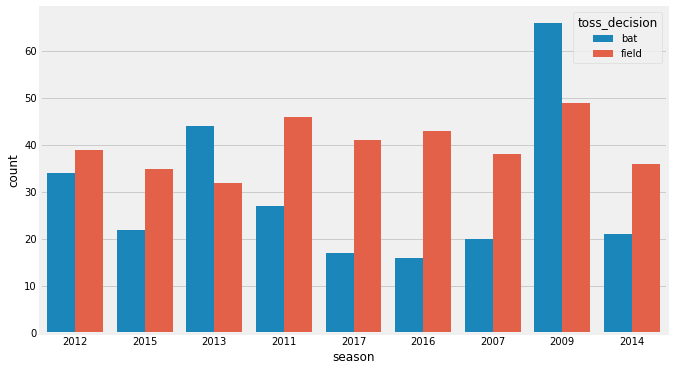

In [48]:
plt.subplots(figsize=(10,6))
sns.countplot(x='season',hue='toss_decision',data=matches_info)
plt.show()

## Most to least toss winning teams

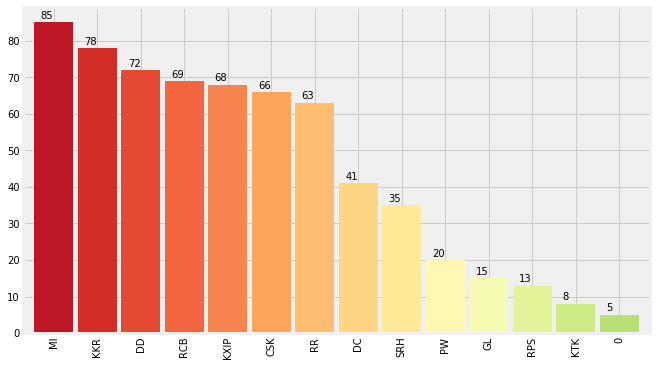

In [49]:
plt.subplots(figsize=(10,6))
ax=matches_info['toss_winner'].value_counts().plot.bar(width=0.9,color=sns.color_palette('RdYlGn',20))
for p in ax.patches:
    ax.annotate(format(p.get_height()), (p.get_x()+0.15, p.get_height()+1))
plt.show()


## Is the toss winner always the match winner ?

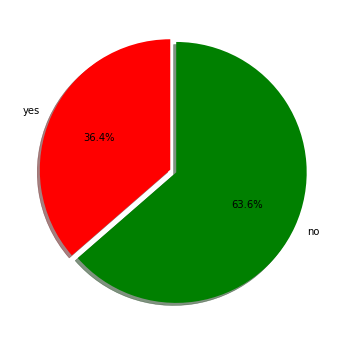

In [50]:
df=matches_info[matches_info['toss_winner']==matches_info['winner']]
slices=[len(df),(577-len(df))]
labels=['yes','no']
plt.pie(slices,labels=labels,startangle=90,shadow=True,explode=(0,0.05),autopct='%1.1f%%',colors=['r','g'])
fig = plt.gcf()
fig.set_size_inches(6,6)
plt.show()
#toss winner is **not** always the match winner

## How many matches were played across each season ?

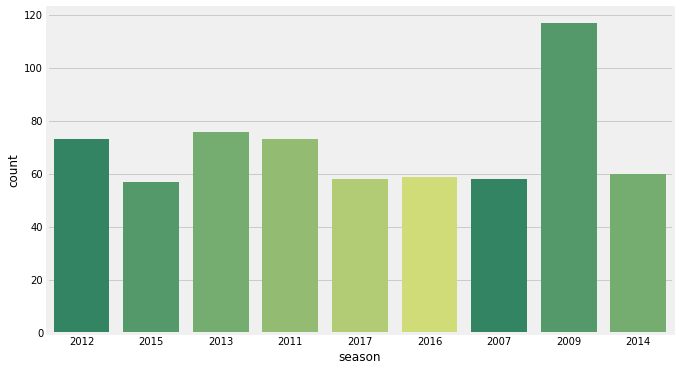

In [51]:
plt.subplots(figsize=(10,6))
sns.countplot(x='season',data=matches_info,palette=sns.color_palette('summer'))  #countplot automatically counts the frequency of an item
plt.show()

## Where were the matches played?

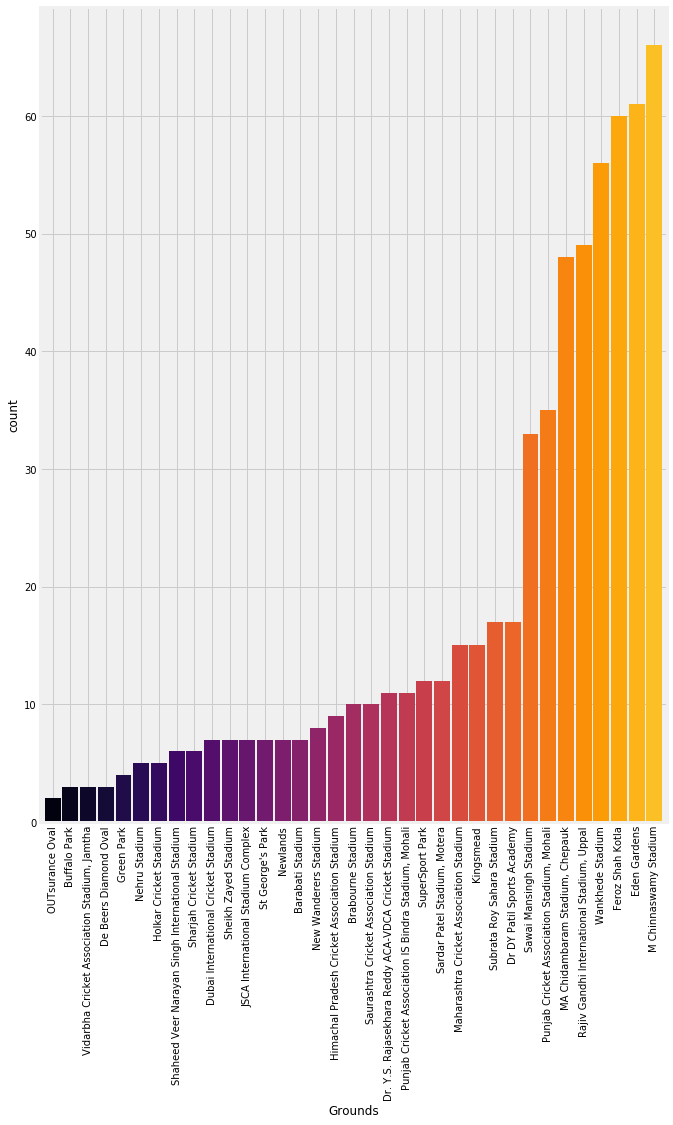

In [52]:
plt.subplots(figsize=(10,15))
ax = matches_info['venue'].value_counts().sort_values(ascending=True).plot.bar(width=.9,color=sns.color_palette('inferno',40))
ax.set_xlabel('Grounds')
ax.set_ylabel('count')
plt.show()

## Grouping by player of match and season to see how many seasons were each player awarded with Player of the match

In [53]:
matches_info.groupby(['player_of_match','season']).first()

city            competition        date  \
player_of_match   season                                                      
A Chandila        2012            Jaipur  Indian Premier League  2012/05/13   
A Kumble          2009      Johannesburg  Indian Premier League  2009/05/24   
                  2014            Mumbai  Indian Premier League  2014/05/23   
                  2016           Chennai  Indian Premier League  2016/05/07   
A Mishra          2007             Delhi  Indian Premier League  2008/05/15   
                  2013         Hyderabad  Indian Premier League  2013/04/05   
                  2014         Hyderabad  Indian Premier League  2014/05/20   
                  2016             Delhi  Indian Premier League  2016/04/15   
                  2017            Mumbai  Indian Premier League  2017/04/24   
A Nehra           2007            Mumbai  Indian Premier League  2008/05/07   
                  2009       East London  Indian Premier League  2009/05/08   
                  2013             Delhi  Indian Premier League  2013/04/18   
                  2015            Ranchi  Indian Premier League  2015/05/22   
                  2016     Visakhapatnam  Indian Premier League  2016/05/08   
A Singh           2011            Mumbai  Indian Premier League  2011/05/14   
A Symonds         2012             Delhi  Indian Premier League  2010/04/18   
                  2014                    Indian Premier League  2014/04/28   
A Zampa           2016     Visakhapatnam  Indian Premier League  2016/05/10   
AA Jhunjhunwala   2009         Ahmedabad  Indian Premier League  2010/03/20   
AB Dinda          2007         Hyderabad  Indian Premier League  2008/05/25   
                  2009         Hyderabad  Indian Premier League         NaN   
AB de Villiers    2009         Centurion  Indian Premier League  2009/05/22   
                  2011             Kochi  Indian Premier League  2011/04/09   
                  2012         Bangalore  Indian Premier League  2012/04/07   
                  2013            Jaipur  Indian Premier League  2013/04/11   
                  2014            Ranchi  Indian Premier League  2014/05/18   
                  2016              Pune  Indian Premier League  2016/04/22   
AC Gilchrist      2007           Chennai  Indian Premier League  2008/05/06   
                  2009         Cape Town  Indian Premier League  2009/04/22   
                  2011        Dharamsala  Indian Premier League  2011/05/17   
...                                  ...                    ...         ...   
V Kohli           2011         Bangalore  Indian Premier League  2011/04/29   
                  2013         Bangalore  Indian Premier League  2013/05/18   
                  2014         Bangalore  Indian Premier League  2014/04/24   
                  2016         Bangalore  Indian Premier League  2016/05/18   
V Sehwag          2007         Hyderabad  Indian Premier League  2008/04/22   
                  2009         Ahmedabad  Indian Premier League  2010/03/15   
                  2011         Hyderabad  Indian Premier League  2011/05/05   
                  2012             Delhi  Indian Premier League  2012/04/27   
                  2013             Delhi  Indian Premier League  2013/04/11   
                  2014            Mumbai  Indian Premier League  2014/05/30   
                  2016         Centurion  Indian Premier League  2016/04/09   
                  2017             Delhi  Indian Premier League  2017/04/09   
VR Aaron          2007             Delhi  Indian Premier League  2008/04/29   
WP Saha           2012           Kolkata  Indian Premier League  2012/05/12   
                  2014         Hyderabad  Indian Premier League  2014/05/14   
                  2017            Mumbai  Indian Premier League  2017/05/11   
WPUJC Vaas        2015           Kolkata  Indian Premier League  2015/05/04   
Washington Sundar 2011            Mumbai  Indian Premier League  2011/05/25   
YK Path

## Maximum Man of the Matches

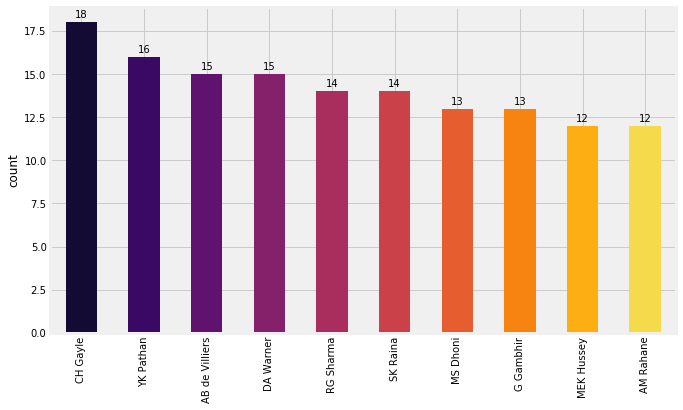

In [54]:
plt.subplots(figsize=(10,6))
ax = matches_info['player_of_match'].value_counts().head(10).plot.bar(width=0.5, color=sns.color_palette('inferno',10)) 
ax.set_ylabel('count')
for p in ax.patches:
    ax.annotate(format(p.get_height()), (p.get_x()+0.15, p.get_height()+0.25))
plt.show()

## Few more groubys to study the dataset

In [55]:
matches_info.groupby(['outcome', 'toss_decision']).max()

city eliminator team       umpire
outcome   toss_decision                                            
no result bat                  Chennai          0  RCB      AL Hill
          field                  Delhi          0   MI    PG Pathak
not known bat            Visakhapatnam          0  SRH    VK Sharma
          field           missing city          0  SRH    VK Sharma
tie       bat                Hyderabad        SRH  KKR  VA Kulkarni
          field                 Kanpur       KXIP  SRH       S Ravi

In [56]:
matches_info.groupby(['season','player_of_match']).max()

city    outcome  team           umpire
season player_of_match                                                  
2007   A Mishra                  Delhi  not known    DC   GA Pratapkumar
       A Nehra                  Mumbai  not known   RPS      RE Koertzen
       AB Dinda              Hyderabad  not known   RCB    C Shamshuddin
       AC Gilchrist            Chennai  not known    DC        RB Tiffin
       AM Rahane                Jaipur  not known    DD        RJ Tucker
       BB McCullum           Bangalore  not known   KKR      RE Koertzen
       CH Gayle           missing city  not known   RCB        SD Ranade
       CRD Fernando          Bangalore  not known    MI   AV Jayaprakash
       DA Warner                 Delhi  not known    RR     K Srinivasan
       DJ Bravo              Hyderabad  not known    DD        DJ Harper
       DJ Hussey               Kolkata  not known    MI      K Hariharan
       DPMD Jayawardene      Kimberley  not known   RCB        AM Saheba
       DW Steyn                 Mumbai  not known    DD       SJA Taufel
       F du Plessis          Bangalore  not known    DD     BNJ Oxenford
       G Gambhir            Chandigarh  not known   RCB        RJ Tucker
       GD McGrath                Delhi  not known   RCB        I Shivram
       GH Vihari             Hyderabad  not known   CSK        CK Nandan
       Harmeet Singh            Jaipur  not known   CSK        K Srinath
       JD Unadkat                Delhi  not known    DC        K Srinath
       JDP Oram                Chennai  not known   KKR   AV Jayaprakash
       JJ Bumrah             Bangalore  not known    RR        CK Nandan
       KD Karthik                Delhi  not known    DD      K Hariharan
       M Ntini                  Mumbai  not known  KXIP      K Hariharan
       M Vijay                 Chennai  not known   KKR        RB Tiffin
       MEK Hussey           Chandigarh  not known   CSK       SL Shastri
       ML Hayden               Chennai  not known   RCB   GA Pratapkumar
       MS Dhoni              Bangalore  not known   CSK      BR Doctrove
       MV Boucher               Mumbai  not known   RCB         SJ Davis
       P Kumar               Bangalore  not known    DC       SL Shastri
       RP Singh             Chandigarh  not known   KKR      BR Doctrove
...                                ...        ...   ...              ...
2017   LMP Simmons               Delhi  not known  KXIP        CK Nandan
       MEK Hussey            Bangalore  not known   KKR        RB Tiffin
       MJ McClenaghan           Mumbai  not known    DD           S Ravi
       MM Sharma            Chandigarh  not known   KKR           S Ravi
       MS Bisla                Chennai  not known    MI       SJA Taufel
       Mandeep Singh             Delhi  not known    GL      SK Tarapore
       Mohammed Shami            Delhi  not known   SRH      Nitin Menon
       Mohammed Siraj           Kanpur        tie   SRH      Nitin Menon
       N Rana                   Mumbai  not known    GL           S Ravi
       NM Coulter-Nile         Kolkata  not known   KKR        CK Nandan
       P Parameswaran            Delhi  not known   RCB       SL Shastri
       RA Jadeja         Visakhapatnam  not known    GL  HDPK Dharmasena
       RA Tripathi             Kolkata  not known   RPS   A Nand Kishore
       RG Sharma                Mumbai  not known    DD      CB Gaffaney
       RV Uthappa                 Pune  not known   KKR         NJ Llong
       Rashid Khan          Chandigarh  not known   SRH        CK Nandan
       S Dhawan              Hyderabad  not known    MI        M Erasmus
       SK Raina              Bangalore  not known    MI      VA Kulkarni
       SL Malinga                Delhi  not known   KKR        RB Tiffin
       SP Narine               Kolkata  not known  KXIP         NJ Llong
       SPD Smith                  Pune  not known    MI      BR Doctrove
       SR Watson             Bangalore  not known   KKR      BR Doctrove
       SS Iyer     